In [67]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize, rgb2hex
import seaborn as sns
sns.set(style="darkgrid", palette='pastel')
import numpy as np
import folium
from IPython.display import Image

### Split Data
Split data randomly into training set (20,000 rows) and test set (the remaining).

In [2]:
# with open("data/kc_house_data.csv", "rb") as f:
#     data = f.read().split('\n')
data = pd.read_csv("data/kc_house_data.csv")
train = data.sample(n=20000, random_state=100)
test = data.drop(train.index)

In [3]:
train.shape, test.shape

((20000, 21), (1613, 21))

In [13]:
train.to_csv('data/train.csv', index = False)
test.to_csv('data/test.csv', index = False)

### Exploratory Data Analysis

In [13]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [14]:
def processData(df):
    #df['date'] = df.date.map(lambda x: pd.Period(x, freq='M'))
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', drop=True, inplace=True)
    df.sort_index(inplace=True)

In [15]:
processData(train)
train

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02   452500.0         3       2.50         2430     88426     1.0   
2014-05-02   463000.0         3       1.75         1710      7320     1.0   
2014-05-02   490000.0         2       1.00          880      6380     1.0   
2014-05-02   612500.0         4       2.50         2730     12261     2.0   
2014-05-02   235000.0         2       1.00         1210      9400     1.0   
2014-05-02   335000.0         3       2.25         1580     16215     1.0   
2014-05-02   437500.0         3       2.25         1970     35100     2.0   
2014-05-02   750000.0         3       2.50         2390      6550     1.0   
2014-05-02   445700.0         3       2.50         1270      1180     3.0   
2014-05-02   550000.0         3       1.75         2910     35200     1.5   
2014-05-02   675000.0         5       2.50         2820     67518     2.0   
2014-05-02  2384000.0         5       2.50         3650      9050     2.0   
2014-05-02   382500.0         4       1.75         1560      8700     1.0   
2014-05-02   295000.0         2       2.50         1630      1368     2.0   
2014-05-02   615000.0         3       1.75         2360      7291     1.0   
2014-05-02   400000.0         4       2.50         3630     42884     1.5   
2014-05-02   287200.0         3       3.00         1850     19966     1.0   
2014-05-02   257950.0         3       1.75         1370      5858     1.0   
2014-05-02   430000.0         4       1.50         1920     10000     1.0   
2014-05-02   300000.0         3       2.50         2540      5050     2.0   
2014-05-02   470000.0         5       2.50         2210      9655     1.0   
2014-05-02  1200000.0         5       2.75         2910      9480     1.5   
2014-05-02   838000.0         4       2.50         3310     42998     2.0   
2014-05-02   630000.0         4       2.75         2710     37277     2.0   
2014-05-02   403000.0         3       2.00         1960     13100     1.0   
2014-05-02   407500.0         3       2.50         1930     10460     2.0   
2014-05-02   385000.0         3       3.25         1320      1327     2.0   
2014-05-02   242500.0         3       1.50         1200      9720     1.0   
2014-05-02   313000.0         3       1.50         1340      7912     1.5   
2014-05-02   640000.0         4       2.00         1520      6200     1.5   
...               ...       ...        ...          ...       ...     ...   
2015-05-13  1620000.0         4       2.25         2350     17709     2.0   
2015-05-13   724500.0         3       3.25         3240      4185     2.0   
2015-05-13   250000.0         2       2.00         1130      5500     1.0   
2015-05-13   465000.0         4       1.75         1640      7194     1.5   
2015-05-13   372000.0         5       2.50         2840      6010     2.0   
2015-05-13  2050000.0         5       3.00         3830      8480     2.0   
2015-05-13   480000.0         3       2.25         1820     15000     1.0   
2015-05-13   751000.0         5       2.75         2860      5280     2.0   
2015-05-13   425000.0         3       2.75         3370     13929     2.0   
2015-05-13   775000.0         5       3.50         3730     16679     1.0   
2015-05-13   415000.0         3       2.25         1640      5880     1.0   
2015-05-13   242150.0         4       1.75         1490      8544     1.0   
2015-05-13   180000.0         2       1.00          800      9450     1.0   
2015-05-13   245000.0         3       1.50         1340      7391     1.0   
2015-05-13   495000.0         4       3.50         2490     18042     2.0   
2015-05-13   330000.0         4       1.75         1720      8300     1.0   
2015-05-14   183000.0         3       1.00         1170      7320     1.0   
2015-05-14   440000.0         5       2.00         1430      5600     1.5   
2015-05-14   725000.0         4       1.75         1980      5850     1.0   
2015-05-14  

### Time series characteristics

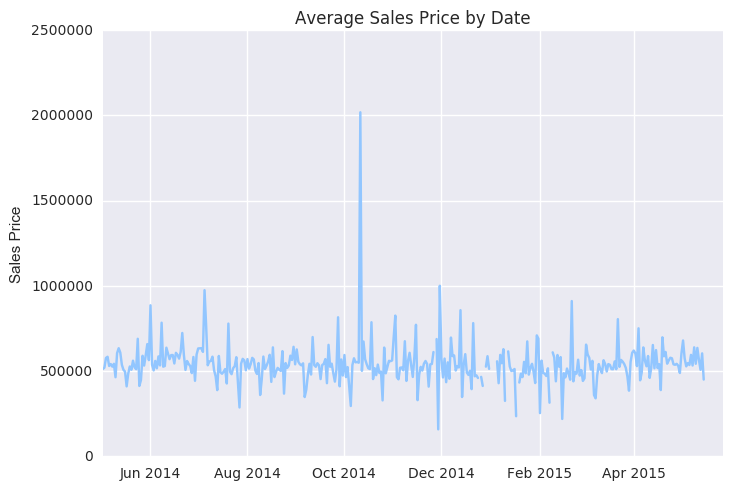

In [275]:
bydate = train.price.resample('D').mean()
plt.plot(bydate)
plt.ylabel('Sales Price')
plt.title('Average Sales Price by Date')

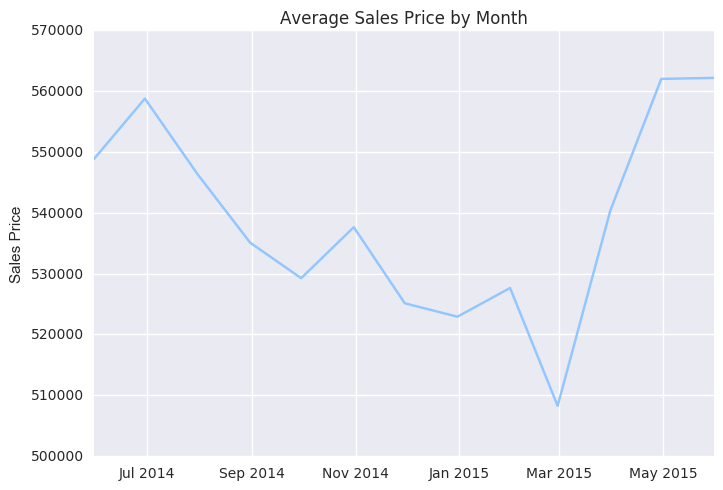

In [276]:
bymonth = train.price.resample('M').mean()
plt.plot(bymonth)
plt.ylabel('Sales Price')
plt.title('Average Sales Price by Month')

The average price exhibits seasonality. The daily price is very noisy. We should consider using month as a feature to model this seasonal pattern. As the test data is from the same year as the training data, there is no need to model inflation.

### Home size and number of rooms

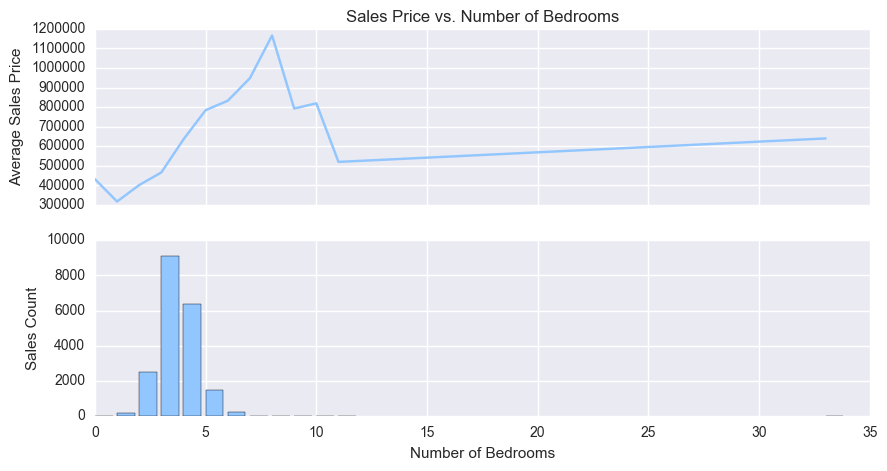

In [23]:
bybed = train.groupby('bedrooms').agg(['count', 'mean'])['price']
f, axes = plt.subplots(2, figsize=(10, 5), sharex=True)
axes[0].plot(bybed.index, bybed['mean'])
axes[1].bar(bybed.index, bybed['count'])
axes[1].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Average Sales Price')
axes[1].set_ylabel('Sales Count')
axes[0].set_title('Sales Price vs. Number of Bedrooms')

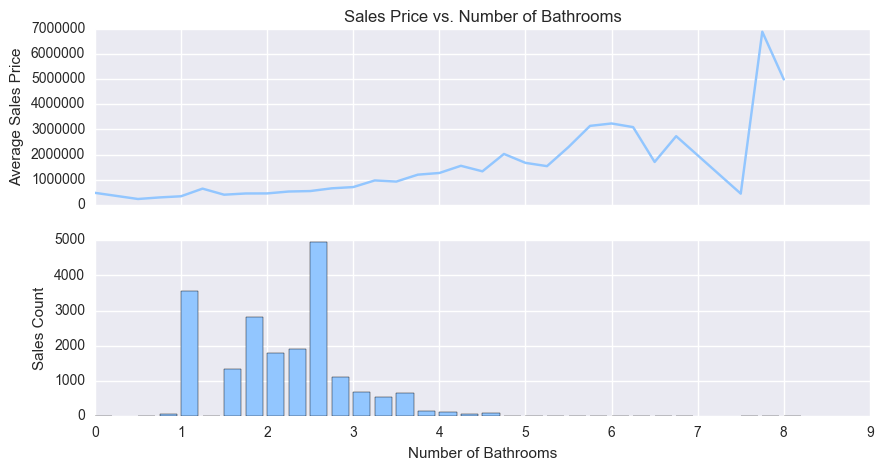

In [24]:
bybath = train.groupby('bathrooms').agg(['count','mean'])['price']
f, axes = plt.subplots(2, figsize=(10, 5), sharex=True)
axes[0].plot(bybath.index, bybath['mean'])
axes[1].bar(bybath.index, bybath['count'], width = 0.2)
axes[1].set_xlabel('Number of Bathrooms')
axes[0].set_ylabel('Average Sales Price')
axes[1].set_ylabel('Sales Count')
axes[0].set_title('Sales Price vs. Number of Bathrooms')

The number of bedrooms and bathrooms are generally good indication. Homes with more than 6 beds or 5 baths have very few appearenced and could also indicate inaccurate data.

NameError: name 'corrfunc' is not defined

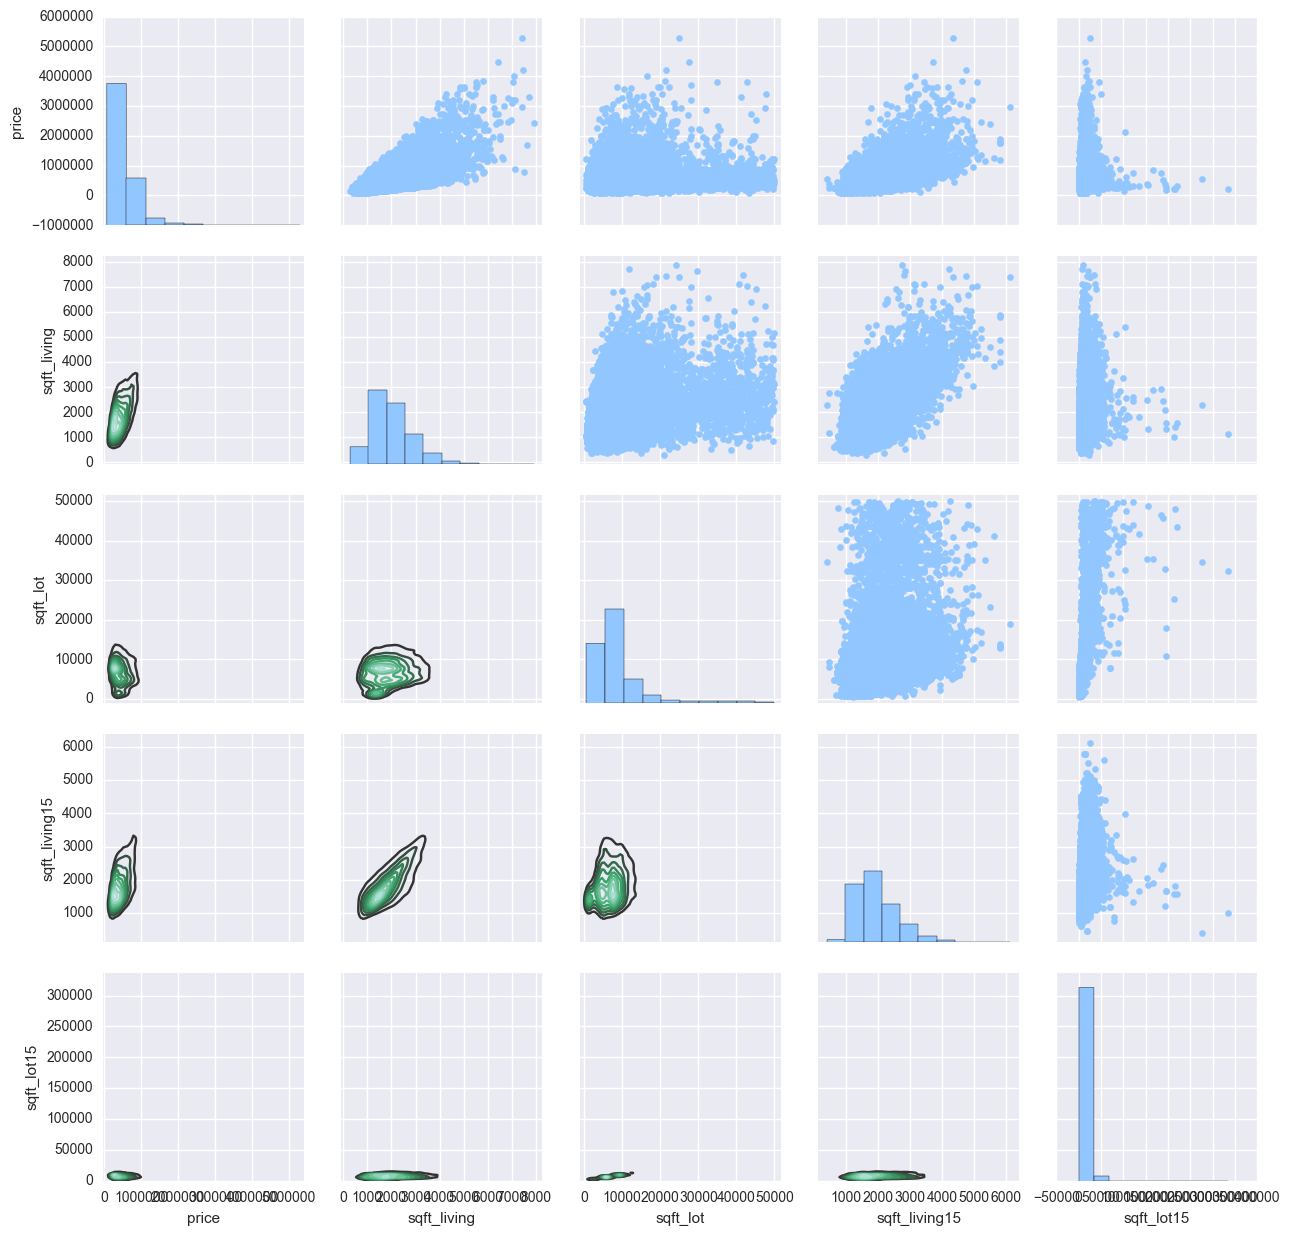

In [71]:
train_sub = train[(train.sqft_living < 8000) & (train.sqft_lot < 50000) & (train.bedrooms < 10)]
g = sns.PairGrid(train_sub, vars=['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15'])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_lower(corrfunc)
#g.add_legend();

Size of the living space is a very strong predictor, though the variance increases with price, which may suggest the necessity of a log tranformation of price.

In contrst, the lot size is a weak predictor for the price. One explanation may be that while everything else being equal, bigger lots means higher price, but homes in more in-demand neighborhoods tend to have smaller lots due to the high land value, and thus having high price despite small lot size.

### Other categorical features

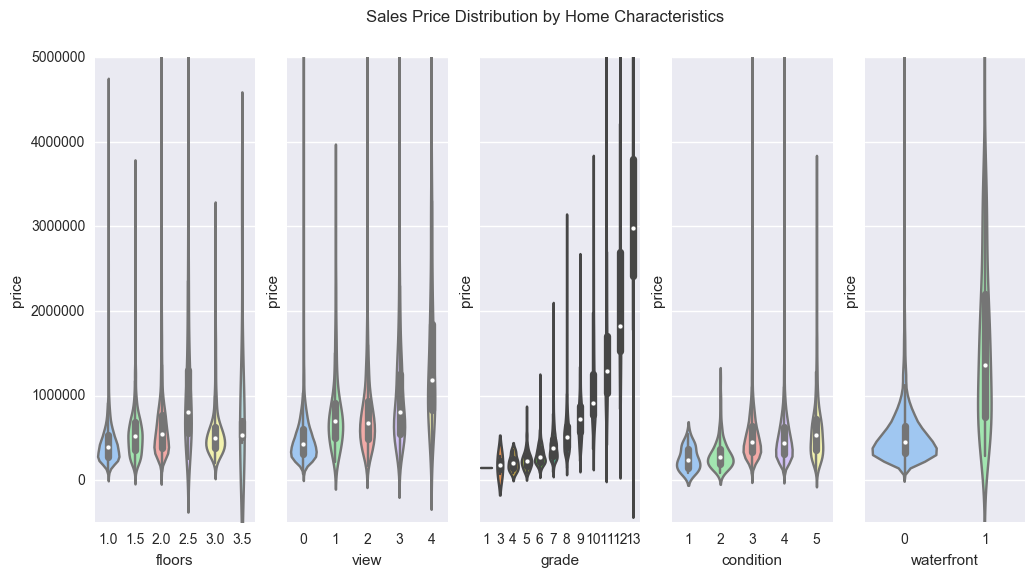

In [46]:
f, axes = plt.subplots(1, 5, figsize=(12,6), sharey=True)
sns.violinplot(x="floors", y="price", data=train, ax=axes[0])
sns.violinplot(x="view", y="price", data=train, ax=axes[1])
sns.violinplot(x="grade", y="price", data=train, ax=axes[2])
sns.violinplot(x="condition", y="price", data=train, ax=axes[3])
sns.violinplot(x="waterfront", y="price", data=train, ax=axes[4])
for i in range(0,5):
    axes[i].set_ylim([-5e5,5e6])
f.suptitle('Sales Price Distribution by Home Characteristics')

Each of the characteristics have statistically significant impact on average sales price. Although, the relationship is not linear as levels are merely coded as integers. We should treat these as categorical features in our models.

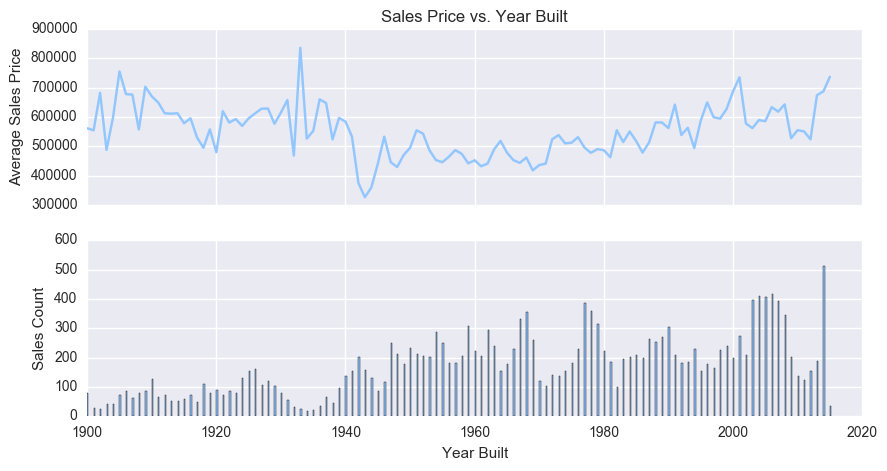

In [60]:
byyr_bt = train.groupby('yr_built').agg(['count', 'mean'])['price']
f, axes = plt.subplots(2, figsize=(10, 5), sharex=True)
axes[0].plot(byyr_bt.index, byyr_bt['mean'])
axes[1].bar(byyr_bt.index, byyr_bt['count'], width = 0.2)
axes[1].set_xlabel('Year Built')
axes[0].set_ylabel('Average Sales Price')
axes[1].set_ylabel('Sales Count')
axes[0].set_title('Sales Price vs. Year Built')

In [38]:
train2 = train
train2['most_recent_renov'] = np.maximum(train2['yr_built'], train2['yr_renovated'])

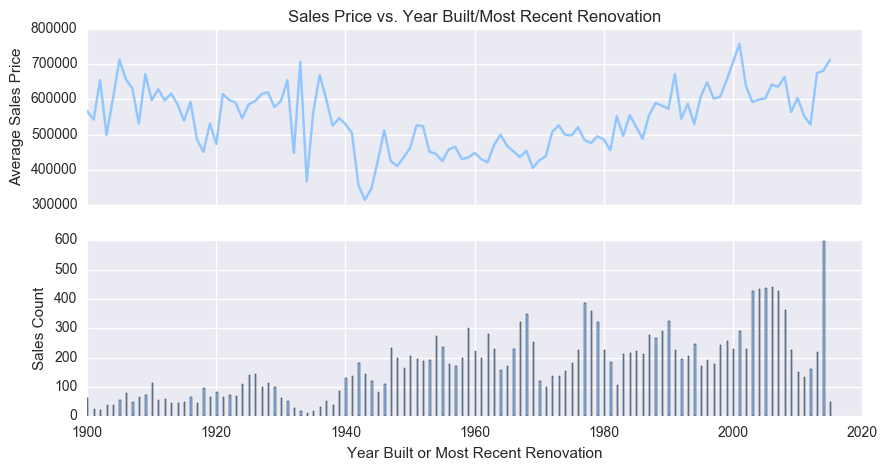

In [68]:
byrecent_renov = train.groupby('most_recent_renov').agg(['count', 'mean'])['price']
f, axes = plt.subplots(2, figsize=(10, 5), sharex=True)
axes[0].plot(byrecent_renov.index, byrecent_renov['mean'])
axes[1].bar(byrecent_renov.index, byrecent_renov['count'], width = 0.2)
axes[1].set_xlabel('Year Built or Most Recent Renovation')
axes[0].set_ylabel('Average Sales Price')
axes[1].set_ylabel('Sales Count')
axes[0].set_title('Sales Price vs. Year Built/Most Recent Renovation')

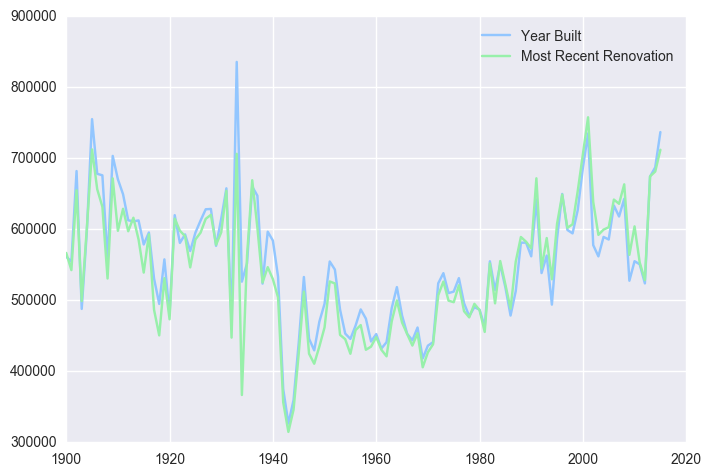

In [67]:
plt.plot(byyr_bt.index, byyr_bt['mean'])
plt.plot(byrecent_renov.index, byrecent_renov['mean'])
plt.legend(['Year Built', 'Most Recent Renovation'])

The difference between prices wrt year built vs. year renovated is not dramatic. Which one to implement in the model should be determined by actual test performance. It may be worth considering including a quadratic term of year given the parabolic shape above.

### Location based features

#### Price by location

In [61]:
norm = Normalize(np.log(train['price']).min(), np.log(train['price']).max())

map = folium.Map(location=[47.6062, -122.3321], zoom_start=10, tiles='Stamen Terrain')
for point in train.iterrows():
    color = rgb2hex(cm.magma(norm(np.log(point[1]['price']))))
    folium.CircleMarker([point[1]['lat'], point[1]['long']],
                     radius = 1, color=color, fill_color=color).add_to(map)

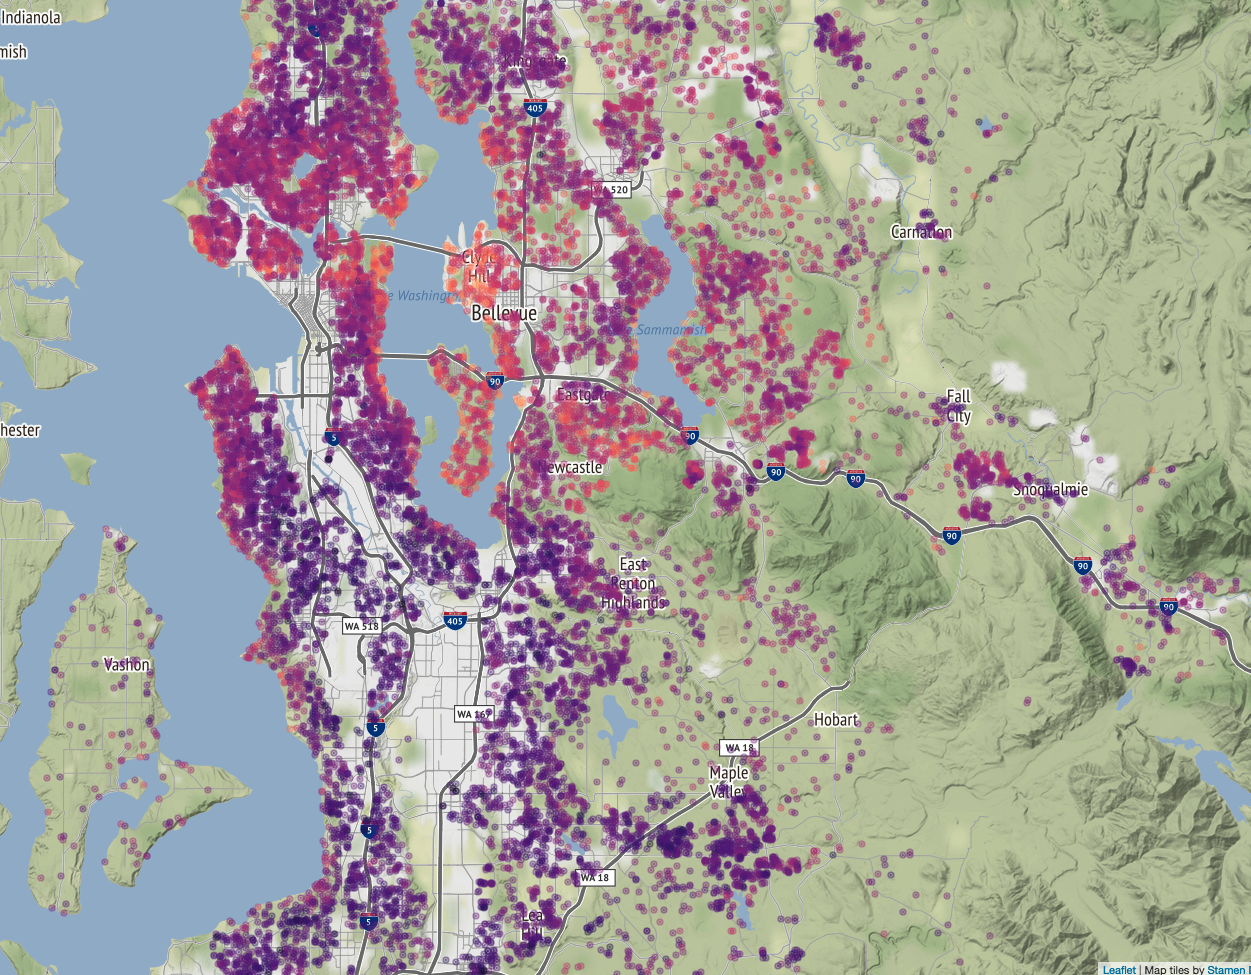

In [66]:
Image(filename='map/price_map.png')
## See html file in "map" folder for interactive map.

#### Per sqft price by location

In [63]:
train2['price_per_sqft'] = train2['price'] / train2['sqft_living']
norm = Normalize(np.log(train2['price_per_sqft']).min(), np.log(train2['price_per_sqft']).max())

map2 = folium.Map(location=[47.6062, -122.3321], zoom_start=10, tiles='Stamen Terrain')
for point in train2.iterrows():
    color = rgb2hex(cm.magma(norm(np.log(point[1]['price_per_sqft']))))
    folium.CircleMarker([point[1]['lat'], point[1]['long']],
                     radius = 1, color=color, fill_color=color).add_to(map2)

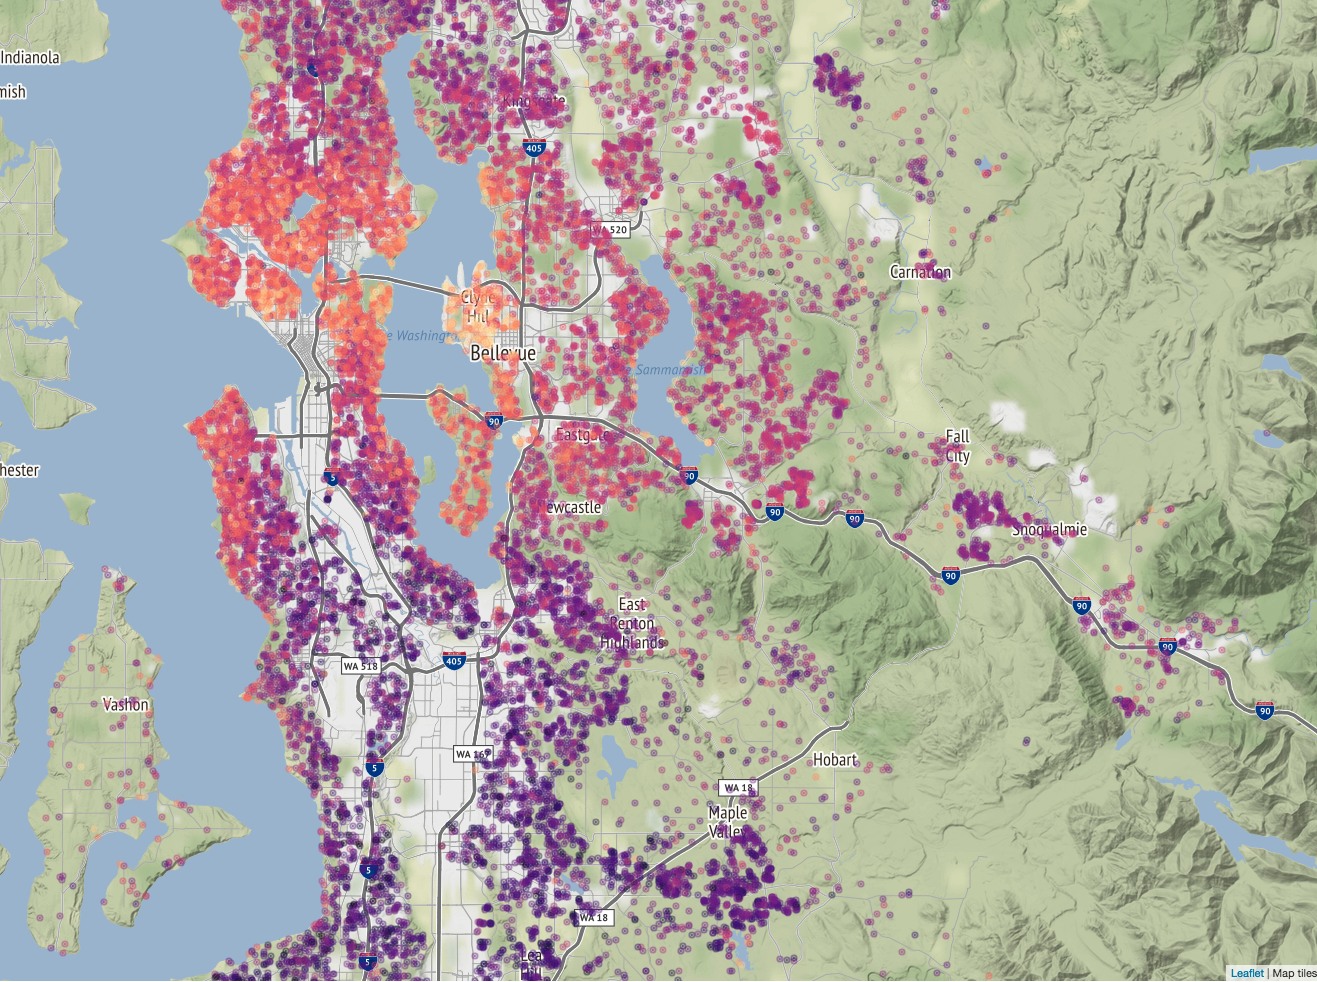

In [68]:
Image(filename='map/price_per_sqft.png')
## See html file in "map" folder for interactive map.

Geographic location may be one of the most important feature in determining the prices for houses with similar sizes. From the price per sqft map we can see that the price level is highly dependent on the neighborhood. In addition, it is apparent that properties on the ocean or lake front command higher per-sqft prices. 

This characteristic may suggest that it makes sense to use a nearest-neighbor approach (specifically nearest neighbor in terms of phycical location, based on latitude and longitude).